# PyTorch-YOLOv3

- 깃헙 원문링크: https://github.com/eriklindernoren/PyTorch-YOLOv3
- PyTorch 로 구현한 YOLOv3 를 Colaboratory 에서 실행해보자. 
- Coloaboratory 의 런타임 >> 런타임 유형변경에서 GPU 사용을 체크하는 것을 잊지말자

## 우선 git clone


In [0]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

## 폴더 이동후 필요한 package 를 설치해준다

In [0]:
cd PyTorch-YOLOv3/

In [0]:
!pip3 install -r requirements.txt

## 에러 발생. 
- torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
- Pillow 버전이 맞지 않는다고 하니 기존의 Pillow 를 uninstall 한 다음 최신으로 install 해준다. 

In [0]:
!pip3 uninstall Pillow -y

In [0]:
!pip3 install Pillow


## 이미 학습 완료한 weight 를 다운로드 받는다

In [0]:
cd weights/

In [0]:
# 스크립트 내용을 한 번 볼까? 
cat /content/PyTorch-YOLOv3/weights/download_weights.sh

In [0]:
!bash download_weights.sh

# 이제 예측을 해보자 
- 상위 폴더로 이동후 
- detect.py 파일을 실행하자
- 이때 --image_folder 옵션에 이미지들이 들어있는 폴더를 지정해주면 된다. 

In [0]:
cd ..

In [0]:
!python3 detect.py --image_folder data/samples

## 기본 제공하는 sample 폴더 내용을 확인해보자

In [0]:
ls -al /content/PyTorch-YOLOv3/data/samples/

## 이미지 하나를 뿌려보자

In [0]:
from IPython.display import Image
Image('/content/PyTorch-YOLOv3/data/samples/dog.jpg')

## YOLO가 예측하여 사각형을 그린 이미지를 확인해보자

In [0]:
ls -al /content/PyTorch-YOLOv3/output/

In [0]:
Image('/content/PyTorch-YOLOv3/output/dog.png')


# 내 Drive 내의 이미지에 접근해보자. 
- Colaboratory 에 파일을 올리는 방법은 여러가지가 있는데 
- 여기서는 google Drive 에 접근하여 미리 올려둔 이미지를 이용하도록 한다. 

### 아래 구글 계정 인증은 이상하게 한번에 안된다. 
- 한번 에러나고 나면
- 다시 실행하자 

In [0]:
cd /content/PyTorch-YOLOv3/

In [0]:
ls -al

## 아래 스크립트는 그냥 실행하자.
- 링크가 나오면 클릭하여 구글인증을 하고 
- Verification code 를 입력해주면 된다. 
- 오류가 나면 이 셀을 다시 실행해서 반복해주면 된다

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


## 디렉토리를 만들고 mount 해주면 쓸 수 있게 된다. 
- drive 폴더로 들어가보면 인증한 구글계정의 구글 드라이브 라는 것을 알 수 있다.

In [0]:
!mkdir -p drive 
!google-drive-ocamlfuse drive 

## 이제 예측을 해보자 
- 예를 들어 google drive 의 test_images 라는 폴더에 테스트할 jpg 이미지들을 넣어두었다면
- 아래와 같이 predict 해주면 된다. 

In [0]:
!python3 detect.py --image_folder /content/PyTorch-YOLOv3/drive/test_images

## 마찬가지로 output 폴더에 가보면 결과를 확인할 수 있다. 

In [0]:
ls -al output/

In [0]:
Image('output/0.png')

In [0]:
Image('output/1.png')

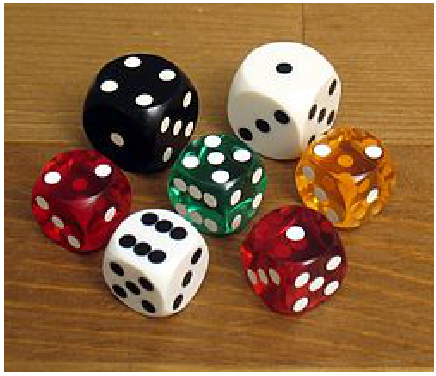

In [0]:
Image('output/2.png')

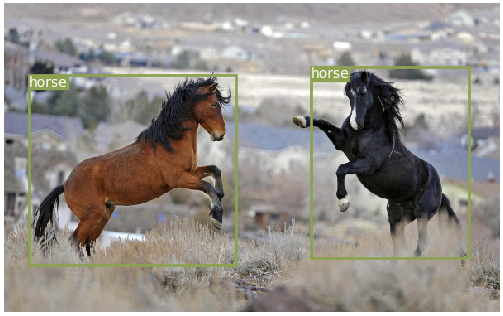

In [0]:
Image('output/3.png')